## 📚 Data
The files `intakes.csv` and `outcomes.csv` contain data from a shelter in Austin, Texas USA. The data comes from the official [City of Austin open data source](https://data.austintexas.gov/).

The dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) contains data on animals admitted from October 1, 2013 to April 27, 2022. The dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) contains data on animals that left the shelter (e.g., were adopted, returned to owners, etc.) during the same time interval.




Using appropriate visualisations, answer the following questions:
* Does the type of animal leaving the shelter (Outcome Type) depend on the type of arrival (Income Type)?
* What is the age of the animals when adopted?
* Is the intake of animals constant throughout the year or are there periods of higher/lower caseloads?


In [105]:
import time
start = time.time()

Now we need to import libraries, which we need to slove our task. 

Pandas helps us to work with DataFrames;
Numpy with arrays and datatypes;
Math with mathematical operations;
Datetime for date type

In [107]:
import pandas as pd
import numpy as np
import datetime
import math

In [108]:
# let's take data from csv to DataFrame
intakes = pd.read_csv("csv_files/intakes.csv", sep=',')
outcomes = pd.read_csv("csv_file/outcomes.csv", sep=',')

Let's find info about DataFrames. 

In [109]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


In [110]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Both DataFrames have similar columns, instead of 1.

4th in first one called "Found Location" and 4th in second one "Date of birth".


All columns have type `"object"`. The reason for it is importing data from csv. This import doesn't save data's type, so we need to set it manually.

Also some columns have `NULL` value, so we need to set `NaN` value in those cells.


In [111]:
def add_nan_values(df):
    for idx, rows in df.iterrows():
         for column in df.columns:
             if type(rows[f"{column}"]) == float:             #NULL value has a float typem so we check cell on type
                 if math.isnan(rows[f"{column}"]):            # check, if cell has NULL value
                     rows[f"{column}"] = "NaN"
    return df

In [112]:
intakes = add_nan_values(intakes)
outcomes = add_nan_values(outcomes)

In [113]:
for column in outcomes.columns:
    unique_values = list(outcomes[f'{column}'].unique())
    if(len(unique_values) < 100):
        print(f"{column}: {unique_values}")

Outcome Type: ['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer', 'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', 'NaN']
Outcome Subtype: ['NaN', 'Partner', 'Foster', 'SCRP', 'Out State', 'Suffering', 'Underage', 'Snr', 'Rabies Risk', 'In Kennel', 'Offsite', 'Aggressive', 'Enroute', 'At Vet', 'In Foster', 'Behavior', 'Medical', 'Field', 'Possible Theft', 'Barn', 'Customer S', 'Court/Investigation', 'Emer', 'In Surgery', 'Prc', 'Emergency', 'In State']
Animal Type: ['Cat', 'Dog', 'Other', 'Bird', 'Livestock']
Sex upon Outcome: ['Neutered Male', 'Unknown', 'Intact Male', 'Spayed Female', 'Intact Female', 'NaN']
Age upon Outcome: ['2 years', '1 year', '4 months', '6 days', '7 years', '2 months', '2 days', '3 weeks', '9 months', '4 weeks', '2 weeks', '3 months', '9 years', '10 years', '6 months', '8 years', '3 years', '7 months', '6 years', '4 years', '1 month', '12 years', '5 years', '1 weeks', '5 months', '5 days', '15 years', '11 months', '10 months', '4 days', '16 years',

We can notice, that `Nan` values from `Outcome Type` column can be replaced on `Missing` and from `Sex upon Outcome` column replaced on `Unknown`.

In [114]:
outcomes.loc[outcomes["Outcome Type"] == "NaN", "Outcome Type"] = "Missing"
outcomes.loc[outcomes["Sex upon Outcome"] == "NaN", "Sex upon Outcome"] = "Unknown"

In [115]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              138585 non-null  object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138585 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


In [116]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              138769 non-null  object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138769 non-null  object
 6   Outcome Subtype   138769 non-null  object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138769 non-null  object
 9   Age upon Outcome  138769 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Now we don't have NULL values. All cells have original value or NaN

Now I want to create functions for splitting columns `MonthYear` and `DateTime`

Both this columns have structure like `"smth smth"`. So I will split it by whitespace. And I'll get new columns `"Month", "Year", "Date", "Time"`

In [117]:
def split_month_year(df, t):
    df = df.assign(Month = "")
    df = df.assign(Year = "")
    for idx, rows in df.iterrows():
        l = (rows["MonthYear"]).split(" ")
        rows.Month = l[0]
        rows.Year = l[1]
    df = df.rename({"MonthYear":f"MonthYear {t}"})
    df = df.rename({"Month":f"Month {t}"})
    df = df.rename({"Year":f"Year {t}"})
    
    return df

In [118]:
def split_date_time(df, t):
    df = df.assign(Date = "")
    df = df.assign(Time = "")
    for idx, rows in df.iterrows():
        l = (rows.DateTime).split(" ")
        rows.Date = l[0]
        rows.Time = l[1]
    df = df.rename(columns={"DateTime":f"DateTime {t}"})
    df = df.rename(columns={"Date":f"Date {t}"})
    df = df.rename(columns={"Time":f"Time {t}"})
    return df

In [119]:
intakes = split_month_year(intakes, "Intake")
outcomes = split_month_year(outcomes, "Outcome")

In [120]:
intakes = split_date_time(intakes, "Intakes")
outcomes = split_date_time(outcomes, "Outcome")

Now I want to make fucntion for dropping columns, cause I wanted to drop splitted columns, and I'll need it in next steps

In [121]:
def drop_column(columns, df):
    for i in columns:
        df.drop(i, inplace=True, axis=1)
    return df

In [122]:
intakes = drop_column(["MonthYear"], intakes)
outcomes = drop_column(["MonthYear"], outcomes)

I've noticed, that in column `"Color"`, we have combinations, so I want to split colors.  

In [123]:
intakes = intakes.rename(columns={"Color":"Color Combination"})
outcomes = outcomes.rename(columns={"Color":"Color Combination"})

Now I want to create new column` "Color List"`, which will contain `list()` of a colors, from `"Color Combination"`

Dictionary `colors` will have a structure: 


*   `key` - color
*   `value` - how many times the color was occurred 


In [124]:
colors = {} #dictionary, which will count colors    
def color_to_list(df):

    global colors
    df["Color List"] = ""

    for idx, rows in df.iterrows():
         l_colors = rows["Color Combination"]
         l_colors = l_colors.split('/')
         rows["Color List"] = l_colors
         if(len(l_colors) == 1):
             if l_colors[0] in colors:
                 colors[l_colors[0]]+=1
             else:
                 colors[l_colors[0]] = 1
         else:
             if l_colors[1] in colors:
                 colors[l_colors[1]]+=1
             else:
                 colors[l_colors[1]] = 1
    return df
intakes = color_to_list(intakes)
print(colors)

{'Tricolor': 4243, 'Liver': 42, 'White': 48968, 'Calico': 2381, 'Gray': 2164, 'Chocolate': 768, 'Black': 21007, 'Brown Tabby': 8536, 'Cream Tabby': 988, 'Tan': 10015, 'Torbie': 1583, 'Tortie': 2469, 'Cream': 1262, 'Brown': 12490, 'Blue': 3183, 'Red': 2164, 'Gray Tabby': 405, 'Brown Merle': 176, 'Orange Tabby': 4080, 'Brown Brindle': 1962, 'Blue Tabby': 2157, 'Yellow': 845, 'Red Tick': 178, 'Lynx Point': 723, 'Blue Merle': 359, 'Black Brindle': 187, 'Buff': 709, 'Silver': 172, 'Black Tabby': 263, 'Black Smoke': 210, 'Silver Tabby': 109, 'Sable': 636, 'Blue Tick': 197, 'Seal Point': 519, 'Fawn': 381, 'Apricot': 88, 'Brown Tiger': 26, 'Orange': 353, 'Blue Cream': 105, 'Red Merle': 107, 'Lilac Point': 152, 'Pink': 67, 'Gold': 227, 'Flame Point': 332, 'Chocolate Point': 79, 'Blue Point': 81, 'Tortie Point': 150, 'Black Tiger': 8, 'Yellow Brindle': 51, 'Green': 57, 'Silver Lynx Point': 24, 'Calico Point': 60, 'Blue Smoke': 16, 'Liver Tick': 19, 'Blue Tiger': 14, 'Agouti': 31, 'Cream Tiger': 

Age we need to transform in a common form, the best form, I guess, will be days, so let's transform it to days

All ages contains words `day(-s), week(-s), month(-s), year(-s)`, so we will check just common form. 

For instance, `day` for `day, days `

In [125]:
def age_to_days(df, t):
    for idx, rows in df.iterrows():
        s = str(rows[f"Age upon {t}"])
        res = 0
        if "day" in s:
            res = (s.split(' '))[0]
        if "week" in s:
            res = abs(int((s.split(' '))[0])) * 7
        if "month" in s:
            res = abs(int((s.split(' '))[0])) * 30
        if "year" in s:
            res = abs(int((s.split(' '))[0])) * 365
        rows[f"Age upon {t}"] = res
    return df
intakes = age_to_days(intakes, "Intake")
outcomes = age_to_days(outcomes, "Outcome")

Information about unique values will help us to analyse dataframes and to change type of columns

In [126]:
for i in intakes.columns:
    try:
        print(f"{i} has {len(intakes[i].unique())} unique values")
    except:
        print(f"For {i} we can't use .unique() due to list type")

Animal ID has 123890 unique values
Name has 23545 unique values
DateTime Intakes has 97442 unique values
Found Location has 58367 unique values
Intake Type has 6 unique values
Intake Condition has 15 unique values
Animal Type has 5 unique values
Sex upon Intake has 6 unique values
Age upon Intake has 50 unique values
Breed has 2741 unique values
Color Combination has 616 unique values
Month has 12 unique values
Year has 10 unique values
Date Intakes has 3128 unique values
Time Intakes has 720 unique values
For Color List we can't use .unique() due to list type


Hmm, column Animal ID has less unique values, than rows in intakes. It means, that some Animal ID's are in dataframe more than one time. Let's check it

In [127]:
unique_id = set(intakes["Animal ID"].unique())
ids = {}
not_unique_id = []
for id in unique_id:
    ids[id] = 0
for i in intakes["Animal ID"]:
    ids[i]+=1
count = 0
for i in unique_id:
    if ids[i]>1:
        not_unique_id.append(i)
        #print(f"{i}: {ids[i]}")
        count+=1
print(count)

11235


Does it mean, that 11235 animal were in shelter more than one time? Let's check it 

In [128]:
for idx, rows in intakes.iterrows():
    if rows["Animal ID"] in not_unique_id[0]:
        print(intakes.loc[[idx]])


    Animal ID  Name        DateTime Intakes  \
843   A716018  Luke  11/13/2015 10:46:00 AM   

                                      Found Location Intake Type  \
843  Roseborough Dr And Running Water in Austin (TX)       Stray   

    Intake Condition Animal Type Sex upon Intake Age upon Intake  \
843           Normal         Dog     Intact Male             120   

            Breed Color Combination     Month  Year Date Intakes Time Intakes  \
843  Pit Bull Mix        Fawn/White  November  2015   11/13/2015     10:46:00   

        Color List  
843  [Fawn, White]  
     Animal ID  Name        DateTime Intakes  \
4034   A716018  Luke  03/05/2017 03:42:00 PM   

                              Found Location Intake Type Intake Condition  \
4034  Loyola Ln. & Decker Ln. in Austin (TX)       Stray           Normal   

     Animal Type Sex upon Intake Age upon Intake         Breed  \
4034         Dog   Neutered Male             365  Pit Bull Mix   

     Color Combination  Month  Year Date 

Yes, we can notice, that some animals were in the shelter more than one time. So we will use this fact in a future

In [129]:
intakes.info()
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138585 entries, 0 to 138584
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Animal ID          138585 non-null  object
 1   Name               138585 non-null  object
 2   DateTime Intakes   138585 non-null  object
 3   Found Location     138585 non-null  object
 4   Intake Type        138585 non-null  object
 5   Intake Condition   138585 non-null  object
 6   Animal Type        138585 non-null  object
 7   Sex upon Intake    138585 non-null  object
 8   Age upon Intake    138585 non-null  object
 9   Breed              138585 non-null  object
 10  Color Combination  138585 non-null  object
 11  Month              138585 non-null  object
 12  Year               138585 non-null  object
 13  Date Intakes       138585 non-null  object
 14  Time Intakes       138585 non-null  object
 15  Color List         138585 non-null  object
dtypes: object(16)
memory

Now we need to set correct datatypes for columns

In [130]:
intakes = intakes.astype({"Year": int})
outcomes = outcomes.astype({"Year": int})

intakes = intakes.astype({"DateTime Intakes": np.datetime64})
outcomes = outcomes.astype({"DateTime Outcome": np.datetime64})

intakes = intakes.astype({"Age upon Intake": int})

intakes = intakes.astype({"Sex upon Intake": "category"})
intakes = intakes.astype({"Intake Type": "category"})
intakes = intakes.astype({"Intake Condition": "category"})
intakes = intakes.astype({"Animal Type": "category"})
intakes = intakes.astype({"Breed": "category"})

In [131]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138585 entries, 0 to 138584
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Animal ID          138585 non-null  object        
 1   Name               138585 non-null  object        
 2   DateTime Intakes   138585 non-null  datetime64[ns]
 3   Found Location     138585 non-null  object        
 4   Intake Type        138585 non-null  category      
 5   Intake Condition   138585 non-null  category      
 6   Animal Type        138585 non-null  category      
 7   Sex upon Intake    138585 non-null  category      
 8   Age upon Intake    138585 non-null  int64         
 9   Breed              138585 non-null  category      
 10  Color Combination  138585 non-null  object        
 11  Month              138585 non-null  object        
 12  Year               138585 non-null  int64         
 13  Date Intakes       138585 non-null  object  

In [132]:
for i in outcomes.columns:
    try:
        print(f"{i} has {len(outcomes[i].unique())} unique values")
    except:
        print(f"For {i} we can't use .unique() due to list type")

Animal ID has 124068 unique values
Name has 23426 unique values
DateTime Outcome has 115364 unique values
Date of Birth has 7576 unique values
Outcome Type has 9 unique values
Outcome Subtype has 27 unique values
Animal Type has 5 unique values
Sex upon Outcome has 5 unique values
Age upon Outcome has 50 unique values
Breed has 2749 unique values
Color Combination has 619 unique values
Month has 12 unique values
Year has 10 unique values
Date Outcome has 3119 unique values
Time Outcome has 720 unique values


In [133]:
outcomes = outcomes.astype({"Date of Birth": np.datetime64})
outcomes = outcomes.astype({"Date of Birth": np.datetime64})

outcomes = outcomes.astype({"Outcome Type": "category"})
outcomes = outcomes.astype({"Outcome Subtype": "category"})
outcomes = outcomes.astype({"Animal Type": "category"})
outcomes = outcomes.astype({"Breed": "category"})
outcomes = outcomes.astype({"Sex upon Outcome": "category"})

outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138769 entries, 0 to 138768
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Animal ID          138769 non-null  object        
 1   Name               138769 non-null  object        
 2   DateTime Outcome   138769 non-null  datetime64[ns]
 3   Date of Birth      138769 non-null  datetime64[ns]
 4   Outcome Type       138769 non-null  category      
 5   Outcome Subtype    138769 non-null  category      
 6   Animal Type        138769 non-null  category      
 7   Sex upon Outcome   138769 non-null  category      
 8   Age upon Outcome   138769 non-null  object        
 9   Breed              138769 non-null  category      
 10  Color Combination  138769 non-null  object        
 11  Month              138769 non-null  object        
 12  Year               138769 non-null  int64         
 13  Date Outcome       138769 non-null  object  

Let's check, which columns in both dataframes are same and which are different. It will help us in merging two dataframes 


In [134]:
columns_intakes = []
columns_outcomes = []
for i in intakes.columns:
    columns_intakes.append(i)
for i in outcomes.columns:
    columns_outcomes.append(i)
diff = []
same = []
for i in columns_intakes:
    if i not in columns_outcomes:
        diff.append(i)
        #intakes = intakes.rename(columns={f"{i}":f"Intakes {i}"})
    else:
        same.append(i)
for i in columns_outcomes:
    if i not in columns_intakes:
        diff.append(i)
        #outcomes = outcomes.rename(columns={f"{i}":f"Outcomes {i}"})
#same = list(dict.fromkeys(same)) # delete duplicates
print("Different: ")
for i in diff:
    print(i)
print("\nSame: ")
for i in same:
    print(i)

Different: 
DateTime Intakes
Found Location
Intake Type
Intake Condition
Sex upon Intake
Age upon Intake
Date Intakes
Time Intakes
Color List
DateTime Outcome
Date of Birth
Outcome Type
Outcome Subtype
Sex upon Outcome
Age upon Outcome
Date Outcome
Time Outcome

Same: 
Animal ID
Name
Animal Type
Breed
Color Combination
Month
Year


In [135]:
id_intakes = set(intakes["Animal ID"])
id_outcomes = set(outcomes["Animal ID"])
print(f"Amount of pets in df1 must be: {len(id_intakes&id_outcomes)}")
print(f"Amount of pets in df2 must be: {len(id_outcomes-id_intakes)}")

Amount of pets in df1 must be: 123254
Amount of pets in df2 must be: 814


Due to some pets wer in a shelter more than one time, it will be really difficult to merge dataframes. So I plan to continue working with original dataframes.

Let's look, how many times pets from `intakes` dataframe were in shelter more than once. I had dictionary `ids`, so let's use it to get data.

In [136]:
visits_amounts = {}
visits = np.array(list(ids.values()))
#visits = np.array(ids.values()).unique()
visits = list(np.unique(visits))
counter = 0
for key in visits:
    visits_amounts[key] = 0
for id in ids:
    visits_amounts[ids[id]]+=1
    if ids[id]>1:
        counter+=1
amounts = list(visits_amounts.values())

visits.remove(1)
amounts = amounts[1:]
for i in visits:
    print(f"{i} visits: {visits_amounts[i]} pets: {round(visits_amounts[i]/counter*100, 5)}%")

2 visits: 8897 pets: 79.19003%
3 visits: 1664 pets: 14.81086%
4 visits: 451 pets: 4.01424%
5 visits: 118 pets: 1.05029%
6 visits: 50 pets: 0.44504%
7 visits: 34 pets: 0.30263%
8 visits: 11 pets: 0.09791%
9 visits: 6 pets: 0.0534%
11 visits: 1 pets: 0.0089%
12 visits: 1 pets: 0.0089%
14 visits: 1 pets: 0.0089%
33 visits: 1 pets: 0.0089%


# Let's start visualization part

In [137]:
import matplotlib.pyplot as plt # library for plotting graphs

Let's look, which month is the most popular in *`intakes`*  

(later I realised, that it is an aswer for a question:

"*Is the intake of animals constant throughout the year or are there periods of higher/lower caseloads?*")




In [138]:
month_amount = {}
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in months:
    month_amount[i] = 0
for i in intakes.Month:
    month_amount[i]+=1
amount_intake = list(month_amount.values())


I've collected quantity of months to dictionary `month_amount`

Now let's plot statistics and plot lines of `min, max, average` values 

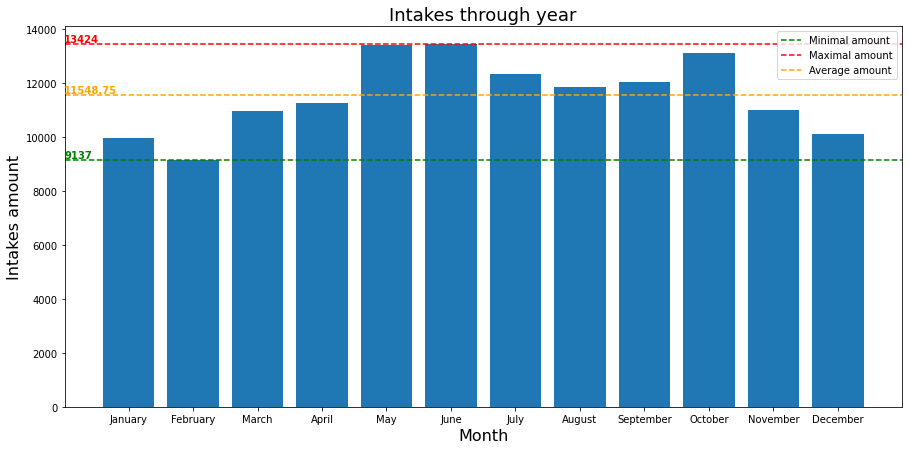

In [139]:
min_amount = min(amount_intake)
max_amount = max(amount_intake)
avg_amount = sum(amount_intake)/12

fig = plt.figure(figsize = (15, 7))
plt.axhline(min_amount, color="green", linestyle="--")
plt.axhline(max_amount, color="red", linestyle="--")
plt.axhline(avg_amount, color="orange", linestyle="--")

# part for plotting avg, min, max on the graph in a digit form
plt.text(-1,min_amount,min_amount, color="green",
         weight="bold", ha="left", va="bottom") 
plt.text(-1,max_amount,max_amount, color="red",
         weight="bold", ha="left", va="bottom")
plt.text(-1,avg_amount,avg_amount, color="orange",
         weight="bold", ha="left", va="bottom")

plt.legend(["Minimal amount","Maximal amount","Average amount"])
plt.bar(months, amount_intake)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Intakes amount", fontsize=16)

plt.title("Intakes through year", fontsize=18)
plt.show()

What about popular outcome month?

In [140]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_amount = {}
for i in months:
    month_amount[i] = 0
for i in outcomes.Month:
    month_amount[i]+=1
amount_outcomes = list(month_amount.values())

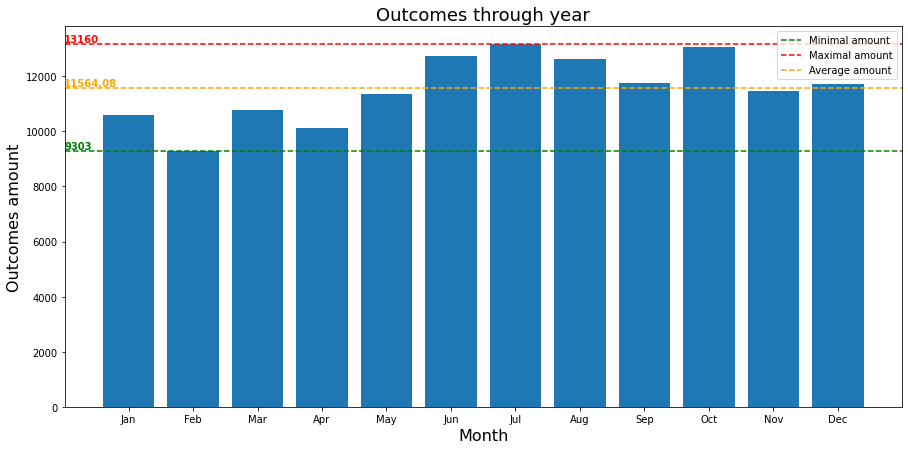

In [141]:
min_amount = min(amount_outcomes)
max_amount = max(amount_outcomes)
avg_amount = sum(amount_outcomes)/12

fig = plt.figure(figsize = (15, 7))
plt.axhline(min_amount, color="green", linestyle="--")
plt.axhline(max_amount, color="red", linestyle="--")
plt.axhline(avg_amount, color="orange", linestyle="--")

plt.text(-1,min_amount,min_amount, color="green", weight="bold", ha="left", va="bottom")
plt.text(-1,max_amount,max_amount, color="red", weight="bold", ha="left", va="bottom")
plt.text(-1,avg_amount,round(avg_amount, 2), color="orange", weight="bold", ha="left", va="bottom")

plt.legend(["Minimal amount","Maximal amount","Average amount"])
plt.bar(months, amount_outcomes)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Outcomes amount", fontsize=16)

plt.title("Outcomes through year", fontsize=18)
plt.show()

Let's vizualise both graphs on one figure

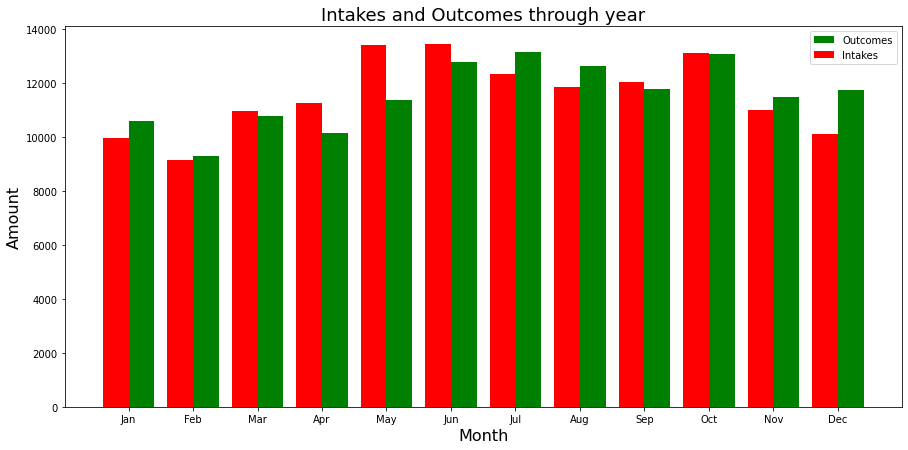

In [142]:
fig = plt.figure(figsize = (15, 7))
x = np.arange(len(months))*2
width = 0.4
plt.bar(x+width, amount_outcomes, color="green")
plt.bar(x-width, amount_intake, color="red")
plt.xticks(x, months)
plt.legend(["Outcomes","Intakes"])
plt.xlabel("Month", fontsize=16)
plt.ylabel("Amount", fontsize=16)

plt.title("Intakes and Outcomes through year", fontsize=18)
plt.show()

From this graph I can conclude, that the biggest amount of intakes in `May and June`. 

Popular outcome months are `July, August and October`

# Let's look on age distribution

In [143]:
age_upon_intake = intakes["Age upon Intake"]
age_amount = {}
keys = age_upon_intake.unique()
keys.sort()
for key in keys:
    age_amount[key] = 0
for i in intakes["Age upon Intake"]:
    age_amount[i]+=1

#for key in keys:
#    print(f"Age {key}: {age_amount[key]}")
amount = list(age_amount.values())
keys = list(keys)

Text(0.5, 1.0, 'Ages')

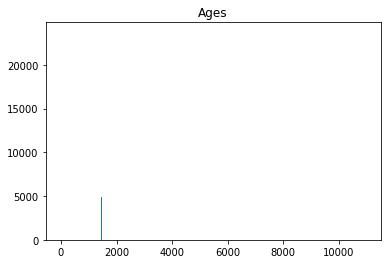

In [144]:
plt.bar(keys, amount)
plt.title("Ages")

This vizualisation doesn't give any information. So we need to make ages in groups(intervals)

1: < 1 year

2: 1-3 years

3: 3-5 years

4: 5-7 years

5: 7+ years

In [145]:
def age_to_interval(df):
    year = 365
    year_amount = {}
    age_interval = []
    year_amount["<1 year"] = 0
    year_amount["1-3 years"] = 0
    year_amount["3-5 years"] = 0
    year_amount["5-7 years"] = 0
    year_amount["7+ year"] = 0
    keys = year_amount.keys()
    
    for i in df.columns:
        if "Age" in i:
            column = i
            break

    for i in df[f"{column}"]:
        if(int(i) < year):
            year_amount["<1 year"]+=1
            age_interval.append("<1 year")
        elif(3*year > int(i) >= year):
            year_amount["1-3 years"]+=1
            age_interval.append("1-3 years")
        elif(5*year > int(i) >= 3*year):
            year_amount["3-5 years"]+=1
            age_interval.append("3-5 years")
        elif(7*year > int(i) >= 5*year):
            year_amount["5-7 years"]+=1
            age_interval.append("5-7 years")
        elif(int(i) >= 7*year):
            year_amount["7+ year"]+=1
            age_interval.append("7+ year")

    return year_amount, age_interval

In [146]:
res = age_to_interval(intakes)
year_amount = res[0]
age_interval = res[1]

<BarContainer object of 5 artists>

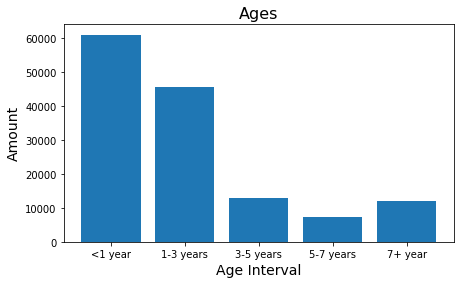

In [147]:
figure = plt.figure(figsize=(7, 4))
keys = list(year_amount.keys())
amount = list(year_amount.values())
plt.xlabel("Age Interval", fontsize = 14)
plt.ylabel("Amount", fontsize = 14)
plt.title("Ages", fontsize = 16)
plt.bar(keys, amount)

We have some animal type, so let's look on statystics in intakes


In [148]:
animals = intakes.drop_duplicates(subset="Animal ID")
animal_amount = animals["Animal Type"].value_counts() 
print(animal_amount)

Dog          65900
Cat          49960
Other         7345
Bird           661
Livestock       24
Name: Animal Type, dtype: int64


Each pet has special color combination, which includes some colors. Let's look which colors are popular between cats.

In [149]:
color_amount = {}
#colors - dictionary of all colors from all animals which we had before
cat_colors = colors.keys()
for i in cat_colors:
    color_amount[i] = 0
for idx, rows in intakes.iterrows():
    if rows["Animal Type"] == "Cat":
        for color in rows["Color List"]:
            color_amount[color] += 1
color_amount_cat = {}
for key, value in color_amount.items():
    if value!=0:
        color_amount_cat[key] = value
print(color_amount_cat)


{'Tricolor': 14, 'White': 18163, 'Calico': 2533, 'Gray': 520, 'Chocolate': 38, 'Black': 12977, 'Brown Tabby': 12770, 'Cream Tabby': 1413, 'Tan': 46, 'Torbie': 1934, 'Tortie': 2652, 'Cream': 188, 'Brown': 188, 'Blue': 3700, 'Red': 7, 'Gray Tabby': 613, 'Brown Merle': 2, 'Orange Tabby': 6026, 'Brown Brindle': 8, 'Blue Tabby': 3114, 'Yellow': 10, 'Red Tick': 1, 'Lynx Point': 816, 'Black Brindle': 3, 'Buff': 39, 'Silver': 21, 'Black Tabby': 343, 'Black Smoke': 238, 'Silver Tabby': 149, 'Sable': 2, 'Seal Point': 592, 'Fawn': 2, 'Apricot': 3, 'Brown Tiger': 18, 'Orange': 419, 'Blue Cream': 105, 'Lilac Point': 172, 'Pink': 2, 'Gold': 1, 'Flame Point': 343, 'Chocolate Point': 91, 'Blue Point': 93, 'Tortie Point': 164, 'Black Tiger': 4, 'Silver Lynx Point': 27, 'Calico Point': 70, 'Blue Smoke': 20, 'Agouti': 25, 'Cream Tiger': 2, 'Orange Tiger': 4}


Now we need to sort dictionary `color_amount_cat` for better vizualisation

In [150]:
sorted_keys = sorted(color_amount_cat, key=color_amount_cat.get, reverse=True)
sorted_color_amount_cat = {}
for color in sorted_keys:
    sorted_color_amount_cat[color] = color_amount_cat[color]
print(sorted_color_amount_cat)


{'White': 18163, 'Black': 12977, 'Brown Tabby': 12770, 'Orange Tabby': 6026, 'Blue': 3700, 'Blue Tabby': 3114, 'Tortie': 2652, 'Calico': 2533, 'Torbie': 1934, 'Cream Tabby': 1413, 'Lynx Point': 816, 'Gray Tabby': 613, 'Seal Point': 592, 'Gray': 520, 'Orange': 419, 'Black Tabby': 343, 'Flame Point': 343, 'Black Smoke': 238, 'Cream': 188, 'Brown': 188, 'Lilac Point': 172, 'Tortie Point': 164, 'Silver Tabby': 149, 'Blue Cream': 105, 'Blue Point': 93, 'Chocolate Point': 91, 'Calico Point': 70, 'Tan': 46, 'Buff': 39, 'Chocolate': 38, 'Silver Lynx Point': 27, 'Agouti': 25, 'Silver': 21, 'Blue Smoke': 20, 'Brown Tiger': 18, 'Tricolor': 14, 'Yellow': 10, 'Brown Brindle': 8, 'Red': 7, 'Black Tiger': 4, 'Orange Tiger': 4, 'Black Brindle': 3, 'Apricot': 3, 'Brown Merle': 2, 'Sable': 2, 'Fawn': 2, 'Pink': 2, 'Cream Tiger': 2, 'Red Tick': 1, 'Gold': 1}


Amount of colors is really huge. 

So let's plot popular and rare colors

In [151]:
more_popular_colors = {}
rare_colors = {}
more_popular_colors_keys = list(sorted_color_amount_cat.keys())[:5] # first 5 colors - most popular
rare_colors_keys = list(sorted_color_amount_cat.keys())[-15:]       # last 15 colors - rare

for color in more_popular_colors_keys:
    more_popular_colors[color] = sorted_color_amount_cat[color]
    
for color in rare_colors_keys:
    rare_colors[color] = sorted_color_amount_cat[color]

print(more_popular_colors)
print(rare_colors)

{'White': 18163, 'Black': 12977, 'Brown Tabby': 12770, 'Orange Tabby': 6026, 'Blue': 3700}
{'Tricolor': 14, 'Yellow': 10, 'Brown Brindle': 8, 'Red': 7, 'Black Tiger': 4, 'Orange Tiger': 4, 'Black Brindle': 3, 'Apricot': 3, 'Brown Merle': 2, 'Sable': 2, 'Fawn': 2, 'Pink': 2, 'Cream Tiger': 2, 'Red Tick': 1, 'Gold': 1}


Text(0.5, 1.0, 'Popular colors')

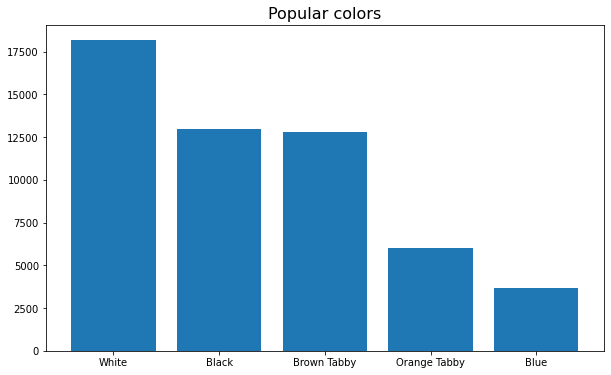

In [152]:
figure = plt.figure(figsize=(10,6))
plt.bar(more_popular_colors_keys, more_popular_colors.values())
plt.title("Popular colors", fontsize = 16)

Text(0.5, 1.0, 'Rare colors')

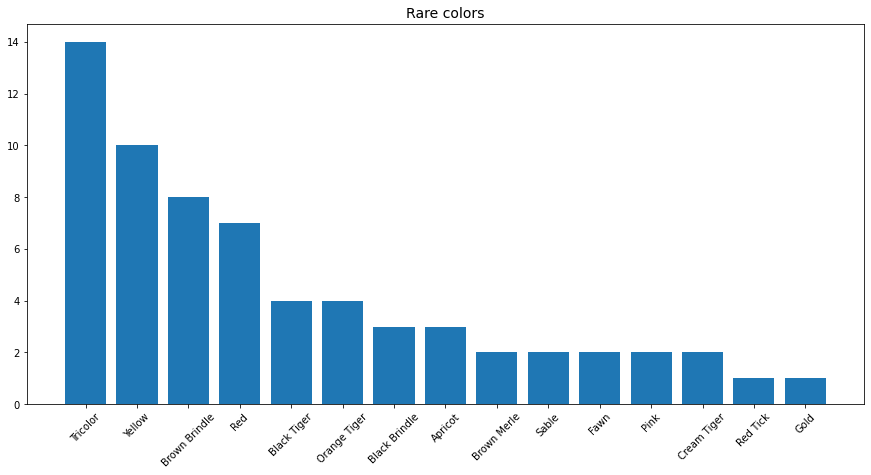

In [153]:
figure = plt.figure(figsize=(15, 7))
plt.xticks(rotation = 45) 
plt.bar(rare_colors_keys, rare_colors.values())
plt.title("Rare colors", fontsize = 14)

Let's look on statistics of column `Sex upon Intake`


In [154]:
sex = list(intakes["Sex upon Intake"].unique())
sex_amount = {}
for key in sex:
    sex_amount[key] = 0
for i in intakes["Sex upon Intake"]:
    sex_amount[i] += 1
amount = sex_amount.values()
print(sex_amount)

{'Neutered Male': 20837, 'Spayed Female': 17736, 'Intact Male': 45635, 'Intact Female': 43307, 'Unknown': 11069, 'NaN': 1}


We won't use *`NaN`* key in out vizualisation, so delete it. 

Let's vizualise in pie form




In [155]:
sex.remove("NaN")
del sex_amount["NaN"]
total_amount = len(intakes["Sex upon Intake"])-1
percent = []

for key in sex:
    print(key)
    percent.append(round(sex_amount[key]/total_amount, 2))

Neutered Male
Spayed Female
Intact Male
Intact Female
Unknown


([<matplotlib.patches.Wedge at 0x7fdd5b595dc0>,
 [Text(0.9801071672559598, 0.4993895680663527, 'Neutered Male'),
  Text(0.23995754141400957, 1.0735084435245696, 'Spayed Female'),
  Text(-1.0349688639905885, 0.3726116618814163, 'Intact Male'),
  Text(0.10351925128402162, -1.0951181509835346, 'Intact Female'),
  Text(1.0654415043906653, -0.27355877014227886, 'Unknown')],
 [Text(0.5346039094123416, 0.2723943098543742, '15%'),
  Text(0.13088593168036883, 0.5855500601043107, '13%'),
  Text(-0.5645284712675936, 0.20324272466259072, '33%'),
  Text(0.05646504615492087, -0.597337173263746, '31%'),
  Text(0.5811499114858173, -0.14921387462306118, '8%')])

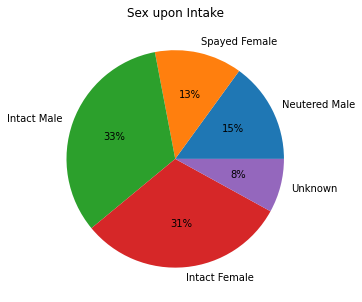

In [156]:
figure = plt.figure(figsize=(10,5))
plt.title("Sex upon Intake")
plt.pie(percent, labels=sex, autopct='%.f%%')

Mostly, there're sex `Intact Male` and `Intact Female`.

Now I want to find a relation/correlation between `Age upon Intake` and `Intake Condition`

In [157]:
conditions = list(intakes["Intake Condition"].unique())
years = year_amount.keys()
condition_amount = {}

for key in conditions:
    condition_amount[key] = 0
for i in intakes["Intake Condition"]:
    condition_amount[i]+=1
intakes["Intake Condition"] = intakes["Intake Condition"] .astype('category')

print(condition_amount)

{'Normal': 119320, 'Sick': 5999, 'Injured': 7844, 'Pregnant': 103, 'Nursing': 3932, 'Aged': 463, 'Medical': 174, 'Other': 245, 'Neonatal': 321, 'Feral': 125, 'Behavior': 49, 'Med Urgent': 2, 'Space': 4, 'Med Attn': 3, 'Panleuk': 1}


In [158]:
intakes["Age Interval"] = np.array(age_interval)
intakes["Age Interval"].unique()
intakes["Age Interval"] = intakes["Age Interval"] .astype('category')

Now we need to create columns for all unique values from Age Interval and Intake Condition


In [159]:
indexes = []
for i in range(1, len(intakes)+1):
    indexes.append(i)
df_corr = pd.DataFrame(index=indexes)
for column in list(intakes["Age Interval"].unique()):
    df_corr[f"{column}"] = 0
for column in conditions:
    df_corr[f"{column}"] = 0
columns = df_corr.columns

In [160]:
for idx, rows in intakes.iterrows():
    df_corr.at[idx, f"{rows['Intake Condition']}"] = 1
    df_corr.at[idx, f"{rows['Age Interval']}"] = 1

In [161]:
df_corr.corr()

,1-3 years,7+ year,<1 year,3-5 years,5-7 years,Normal,Sick,Injured,Pregnant,Nursing,Aged,Medical,Other,Neonatal,Feral,Behavior,Med Urgent,Space,Med Attn,Panleuk
1-3 years,1.000000,-0.215077,-0.618166,-0.224137,-0.165118,0.026427,-0.000544,0.043221,0.014227,-0.093628,-0.039110,-0.007404,-0.000856,-0.029500,-0.001019,0.008938,0.001392,-0.003753,0.000054,-0.001876
7+ year,-0.215077,1.000000,-0.272489,-0.098800,-0.072784,-0.033122,0.027044,0.020622,-0.004631,-0.051998,0.176475,0.004298,0.013304,-0.014836,-0.004978,-0.004426,0.005584,-0.001654,-0.001433,-0.000827
<1 year,-0.618166,-0.272489,1.000000,-0.283968,-0.209194,-0.030061,0.004231,-0.071673,-0.013465,0.164984,-0.049726,0.000648,-0.007478,0.050514,-0.000436,-0.011230,-0.003362,0.006071,0.002132,0.003035
3-5 years,-0.224137,-0.098800,-0.283968,1.000000,-0.075850,0.026060,-0.022183,0.021441,0.006721,-0.049903,-0.017718,0.003332,-0.000514,-0.015461,0.009362,0.003200,-0.001219,-0.001724,-0.001493,-0.000862
5-7 years,-0.165118,-0.072784,-0.209194,-0.075850,1.000000,0.019058,-0.013379,0.014491,-0.002899,-0.039229,-0.006425,0.004361,0.002328,-0.011390,-0.002808,0.007555,-0.000898,-0.001270,-0.001100,-0.000635
Normal,0.026427,-0.033122,-0.030061,0.026060,0.019058,1.000000,-0.529358,-0.609568,-0.067870,-0.425263,-0.144085,-0.088237,-0.104729,-0.119910,-0.074774,-0.046803,-0.009454,-0.013370,-0.011579,-0.006685
Sick,-0.000544,0.027044,0.004231,-0.022183,-0.013379,-0.529358,1.000000,-0.052102,-0.005801,-0.036349,-0.012315,-0.007542,-0.008952,-0.010249,-0.006391,-0.004000,-0.000808,-0.001143,-0.000990,-0.000571
Injured,0.043221,0.020622,-0.071673,0.021441,0.014491,-0.609568,-0.052102,1.000000,-0.006680,-0.041856,-0.014181,-0.008685,-0.010308,-0.011802,-0.007360,-0.004607,-0.000931,-0.001316,-0.001140,-0.000658
Pregnant,0.014227,-0.004631,-0.013465,0.006721,-0.002899,-0.067870,-0.005801,-0.006680,1.000000,-0.004660,-0.001579,-0.000967,-0.001148,-0.001314,-0.000819,-0.000513,-0.000104,-0.000147,-0.000127,-0.000073
Nursing,-0.093628,-0.051998,0.164984,-0.049903,-0.039229,-0.425263,-0.036349,-0.041856,-0.004660,1.000000,-0.009894,-0.006059,-0.007191,-0.008234,-0.005134,-0.003214,-0.000649,-0.000918,-0.000795,-0.000459


Seems like I can't find a correlation table

Let's look on table, where X-axis: `Condition`  Y-axis: `Age Interval`

In [162]:
df_corr = pd.DataFrame(index=list(intakes["Age Interval"].unique()), columns = conditions)
for column in conditions:
    df_corr[f"{column}"] = 0

total_amount = len(intakes)
for idx, rows in intakes.iterrows():
    df_corr.at[rows["Age Interval"],rows["Intake Condition"]] = df_corr.loc[f"{rows['Age Interval']}"][f"{rows['Intake Condition']}"] + 1
print(df_corr)

           Normal  Sick  Injured  Pregnant  Nursing  Aged  Medical  Other  \
1-3 years   39723  1960     3222        59      278     5       40     78   
7+ year      9886   734      865         4        4   437       21     43   
<1 year     51690  2694     2306        20     3611     6       78     86   
3-5 years   11502   378      932        17       33     2       21     22   
5-7 years    6519   233      519         3        6    13       14     16   

           Neonatal  Feral  Behavior  Med Urgent  Space  Med Attn  Panleuk  
1-3 years        13     39        27           1      0         1        0  
7+ year           0      5         1           1      0         0        0  
<1 year         308     54         7           0      4         2        1  
3-5 years         0     23         7           0      0         0        0  
5-7 years         0      4         7           0      0         0        0  


This table doesn't show us statistics, so lets look on table by percents

In [163]:
for idx, rows in df_corr.iterrows():
    for column in conditions:
        df_corr.at[idx,column] = (df_corr.loc[idx][column])/year_amount[f"{idx}"]*100


In [164]:
df_corr

,Normal,Sick,Injured,Pregnant,Nursing,Aged,Medical,Other,Neonatal,Feral,Behavior,Med Urgent,Space,Med Attn,Panleuk
1-3 years,87,4,7,0,0,0,0,0,0,0,0,0,0,0,0
7+ year,82,6,7,0,0,3,0,0,0,0,0,0,0,0,0
<1 year,84,4,3,0,5,0,0,0,0,0,0,0,0,0,0
3-5 years,88,2,7,0,0,0,0,0,0,0,0,0,0,0,0
5-7 years,88,3,7,0,0,0,0,0,0,0,0,0,0,0,0


It looks better. We can conclude, that mostly animals are in `normal` condition

7% of animals older than `1 year` are injured

5% of animals less than `1 year` need nurse

# Let's find an answer for question:

Does the type of animal leaving the shelter (Outcome Type) depend on the type of arrival (Income Type)?

In [165]:
intake_types = list(intakes["Intake Type"].unique())
outcome_types = list(outcomes["Outcome Type"].unique())

I want to make a new DataFrame with animals, who were in a shelter only 1 time.

In [166]:
animal_id = list(intakes["Animal ID"].unique())

Let's get animal ids to dictionary `animal_id_once`, which were in a shelter only once

In [167]:
id_amount = {}
for key in animal_id:
    id_amount[key] = 0
for i in intakes["Animal ID"]:
    id_amount[i] += 1
animal_id_once = {}
for key in animal_id:
    if id_amount[key] == 1:
        animal_id_once[key] = 1


In these dictionaries:

`key` - animal id (who was here only once)

`value` - condition

In [168]:
intake_type_amount = {}
outcome_type_amount = {}

In [169]:
keys = set(animal_id_once.keys())
for idx, rows in intakes.iterrows():
    if rows["Animal ID"] in keys:
        intake_type_amount[rows["Animal ID"]] = rows["Intake Type"]
for idx, rows in outcomes.iterrows():
    if rows["Animal ID"] in keys:
        outcome_type_amount[rows["Animal ID"]] = rows["Outcome Type"]

Intersection of animal id's, which are in `intakes` and `outcomes` both

In [170]:
animal_id_once = set(animal_id_once.keys())
animal_id_once = animal_id_once.intersection(set(outcome_type_amount.keys()))

Let's find combination in a form: `Output condition` <- `Intake condition`

In [171]:
type_intake_outcome = {}
combinations = []
for key in animal_id_once:
    combination = f"Outcome: {outcome_type_amount[key]} <- Intake: {intake_type_amount[key]}"
    if combination not in combinations:
        type_intake_outcome[combination] = 1
        combinations.append(combination)
    else:
        type_intake_outcome[combination] += 1

In [172]:
print(type_intake_outcome)

{'Outcome: Adoption <- Intake: Stray': 36364, 'Outcome: Return to Owner <- Intake: Stray': 10657, 'Outcome: Transfer <- Intake: Stray': 29563, 'Outcome: Transfer <- Intake: Owner Surrender': 6129, 'Outcome: Adoption <- Intake: Owner Surrender': 11026, 'Outcome: Return to Owner <- Intake: Public Assist': 3653, 'Outcome: Euthanasia <- Intake: Wildlife': 4718, 'Outcome: Return to Owner <- Intake: Owner Surrender': 791, 'Outcome: Euthanasia <- Intake: Owner Surrender': 635, 'Outcome: Died <- Intake: Owner Surrender': 164, 'Outcome: Euthanasia <- Intake: Stray': 2893, 'Outcome: Rto-Adopt <- Intake: Stray': 317, 'Outcome: Adoption <- Intake: Public Assist': 912, 'Outcome: Euthanasia <- Intake: Public Assist': 333, 'Outcome: Transfer <- Intake: Abandoned': 218, 'Outcome: Died <- Intake: Stray': 898, 'Outcome: Euthanasia <- Intake: Euthanasia Request': 193, 'Outcome: Adoption <- Intake: Abandoned': 361, 'Outcome: Rto-Adopt <- Intake: Owner Surrender': 159, 'Outcome: Disposal <- Intake: Wildlif

Let's plot combinations in each graph by `Outcome Condition`

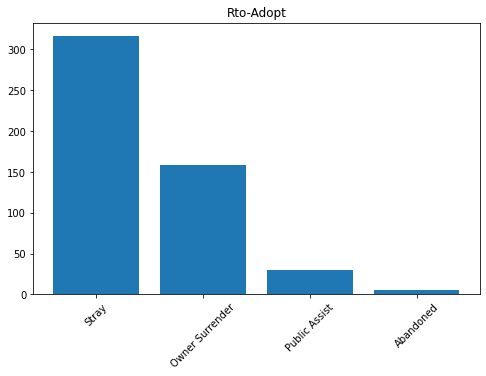

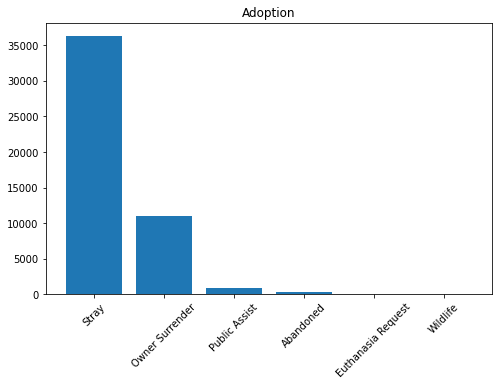

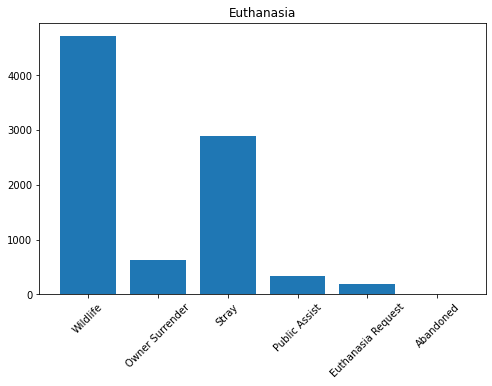

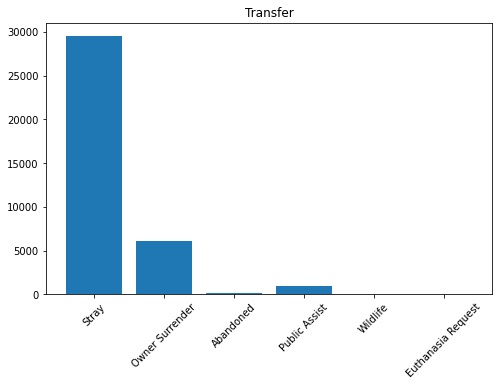

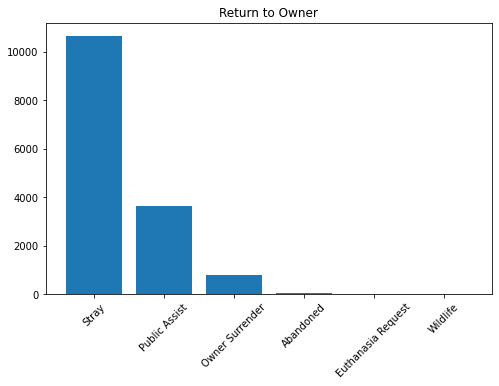

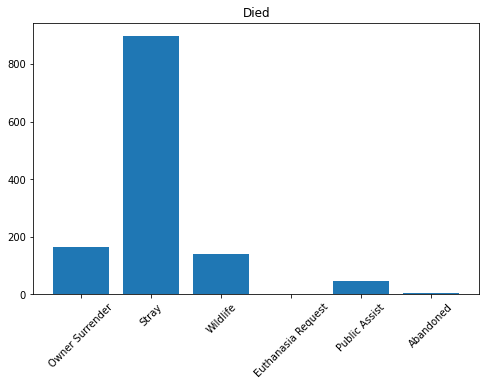

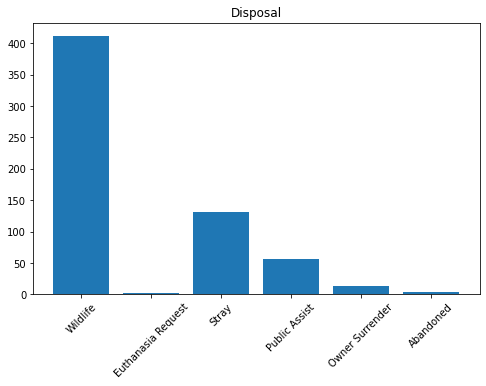

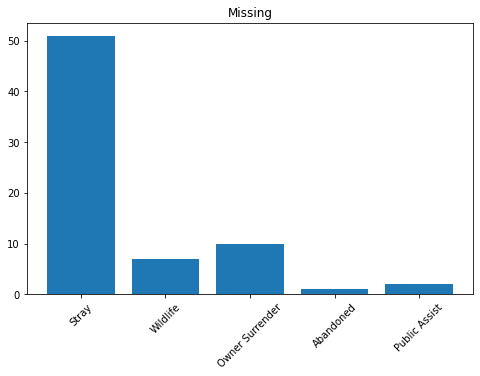

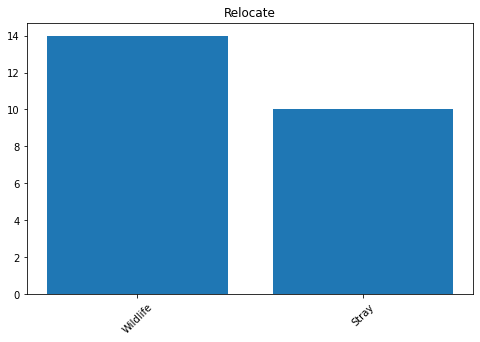

In [173]:
for el in outcome_types:
    figure = plt.figure(figsize = (8,5))
    keys = []
    values = []
    for key in combinations:
        if el in key:
            
            keys.append(key.split(" <- Intake: ")[1])
            values.append(type_intake_outcome[key])
    plt.bar(keys, values)
    plt.xticks(rotation = 45) 
    plt.title(el)
    plt.show()
    print("\n")

This statystics shows us, that Outcome Type mostly depends on Intake Type. However, Euthanasia can be used for any Intake Type.

## Let's find answer for a question:

What is the age of the animals when adopted?

In [174]:
res = age_to_interval(outcomes)
age_interval = res[1]
year_amount = res[0]
outcomes["Age Interval"] = np.array(age_interval)
outcomes["Age Interval"].unique()
outcomes["Age Interval"] = outcomes["Age Interval"] .astype('category')

In [175]:
adopt_age_amount = {}
ages = set()
for idx, rows in outcomes.iterrows():
    # Outcome Type in {Adoption, Rto-Adopt}
    if rows["Outcome Type"] == "Adoption" or rows["Outcome Type"] == "Rto-Adopt":
        if rows["Age Interval"] in ages:
            adopt_age_amount[rows["Age Interval"]] += 1
        else:
             adopt_age_amount[rows["Age Interval"]] = 1
             ages.add(rows["Age Interval"])
sorted_ages = (res[0].keys())

amount = []
for age in sorted_ages:
    amount.append(adopt_age_amount[age])



Text(0.5, 1.0, 'Age of adopted animals')

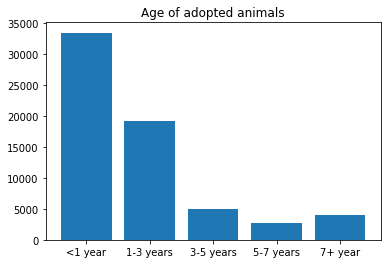

In [176]:
plt.bar(sorted_ages, amount)
plt.title("Age of adopted animals")

This graph looks like graph, which shows how many animals from each age-group. 

It means, that there's no connection between `Age` and `Adoption`.

# My three questions:

1) Do we have animals all years? Or some kind of animal eit of the same age

2) Increase or dicrease amount of intakes through years?

3) Which type of animal dies more? 

# ***First question:***

Each animal group has really different amount, so we need to convert our data to percent form

In [177]:
animals = list(intakes["Animal Type"].unique())
animals.sort()
animals_amount = {}
for animal in animals:
    animals_amount[animal] = 0
for i in intakes["Animal Type"]:
    animals_amount[i] += 1

In [178]:
animals_ages = {}
for animal in animals:
    age_amount = {}
    ages = set()
    for idx, rows in intakes.iterrows():
        if rows["Animal Type"] == animal:
            if rows["Age Interval"] in ages:
                age_amount[rows["Age Interval"]] += 1
            else:
                age_amount[rows["Age Interval"]] = 1
                ages.add(rows["Age Interval"])
    animals_ages[animal] = age_amount

In [179]:
for animal in animals:
    for key in (animals_ages[animal]).keys():
        (animals_ages[animal])[key] = round(((animals_ages[animal])[key]/animals_amount[animal])*100, 2)
    print(animals_ages[animal])

{'1-3 years': 71.71, '<1 year': 22.69, '3-5 years': 2.12, '5-7 years': 1.51, '7+ year': 1.97}
{'<1 year': 65.97, '3-5 years': 4.93, '1-3 years': 19.94, '7+ year': 6.16, '5-7 years': 3.0}
{'1-3 years': 37.59, '7+ year': 11.17, '<1 year': 31.25, '3-5 years': 12.69, '5-7 years': 7.29}
{'<1 year': 62.5, '1-3 years': 37.5}
{'1-3 years': 69.69, '<1 year': 23.4, '3-5 years': 5.72, '5-7 years': 0.76, '7+ year': 0.42}


Let's sort by sorted_ages

In [180]:
sorted_animals_ages = {}
for animal in animals:
    sorted_age_amount = {}
    for key in sorted_ages:
        try:
            sorted_age_amount[key] = (animals_ages[animal])[key]
        except:
            continue
    sorted_animals_ages[animal] = sorted_age_amount
    print(f"{animal}: {sorted_animals_ages[animal]}")

Bird: {'<1 year': 22.69, '1-3 years': 71.71, '3-5 years': 2.12, '5-7 years': 1.51, '7+ year': 1.97}
Cat: {'<1 year': 65.97, '1-3 years': 19.94, '3-5 years': 4.93, '5-7 years': 3.0, '7+ year': 6.16}
Dog: {'<1 year': 31.25, '1-3 years': 37.59, '3-5 years': 12.69, '5-7 years': 7.29, '7+ year': 11.17}
Livestock: {'<1 year': 62.5, '1-3 years': 37.5}
Other: {'<1 year': 23.4, '1-3 years': 69.69, '3-5 years': 5.72, '5-7 years': 0.76, '7+ year': 0.42}


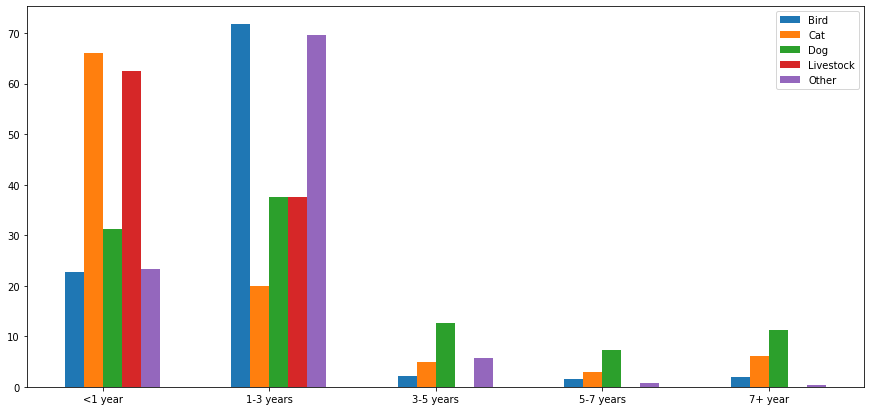

In [181]:
fig = plt.figure(figsize = (15, 7))
width = -2
for animal in animals:
    width += 0.8
    values = list(sorted_animals_ages[animal].values())
    ages = list(sorted_ages)[:len(values)]
    x = np.arange(len(ages))*7
    plt.bar(x+width, values, label=f"{animal}")
    plt.legend()
    plt.xticks(x, list(sorted_ages))
plt.show()

Mostly `Cats` and `Livestocks` less than `1 year`

There are no `Livestocks` older than 3 years

`Birds` mostly in an interval `1-3 years`

`Dogs ` are leaders between old ages, from `3 years` and older

---
## Second question:

In [182]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
year_amount = {}
for year in years:
    year_amount[year] = 0
for i in intakes["Year"]:
    if i in years:
        year_amount[i] += 1
print(year_amount)

{2014: 18656, 2015: 18712, 2016: 17675, 2017: 17563, 2018: 16979, 2019: 19727, 2020: 9585, 2021: 12042}


Text(0.5, 1.0, 'Intakes through years')

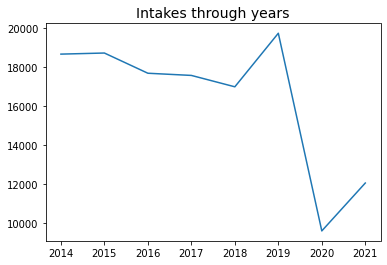

In [183]:
plt.plot(years, list(year_amount.values()))
plt.title("Intakes through years", fontsize=14)

Really low amount of intakes in 2020 and 2021, but I guess it caused by covid. 

Unfortunately, statistic in years before 2020 doesn't show us decreasing amount of intakes.

---
# Third question:

Let's calsulate death between animals in percent's form

In [184]:
animal_death = {}
animal_total = {}
for animal in animals:
    animal_total[animal] = 0
    animal_death[animal] = 0

for idx, rows in outcomes.iterrows():
    animal = rows["Animal Type"]
    animal_total[animal] += 1
    if rows["Outcome Type"] == "Died":
        animal_death[animal] += 1

for animal in animals:
    animal_death[animal] = round((animal_death[animal]/animal_total[animal])*100, 2)
    
print(animal_death)

{'Bird': 3.48, 'Cat': 1.47, 'Dog': 0.39, 'Livestock': 4.0, 'Other': 2.77}


Text(0.5, 1.0, 'Death percents')

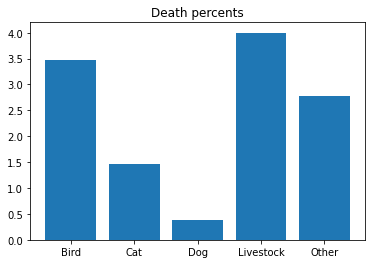

In [185]:
plt.bar(animal_death.keys(), animal_death.values())
plt.title("Death percents")

To my happinnes, measure of death between cats and dogs is the lowest. Less, than 1.5%.

Livestocks dies in 1 out of 25 cases.

In [186]:
print("--- %s seconds ---" % (time.time() - start))

--- 408.96888995170593 seconds ---
